<a href="https://colab.research.google.com/github/kang-narae/AI-DL-DA/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/principles_of_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  학습, 한 번의 epoch 원리

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class add_graph:
  def __init__(self):
    pass
  def forward(self, x, y):
    out = x + y
    return out #더한값 내겠다고
  def backward(self, dout):  #덧셈미분
    dx= 1*dout             #x를 미분하면 1?
    dy= 1*dout         #y를 미분해도 1 ... 거기에 dout 곱함.    ##dout은 어떻게 계산되는 거야 ??
    return dx, dy


In [ ]:
class mul_graph:
  def __init__(self):
    self.x= None
    self.y= None
  def forward(self, x, y):
    self.x = x             #지역변수로 하면 사라지니까, 그렇게 되지 않도록 self에 변수로 저장해놓고  backward함수 때 호출해서 사용하겠다는 거.
    self.y= y
    out = x*y
    return out #곱한 값 내겠다고
  def backward(self, dout):
    dx = self.y * dout          #곱하기를 x에 대해 미분하면 y가 됨
    dy= self.x* dout            #곱하기를 y에 대해 미분하면 x가 된다.
    return dx, dy


    #체인룰?
    

In [ ]:
class mse_graph:
  def __init__(self):
    self.loss= None
    self.y = None  #예측값
    self.t = None     #정답
    self.x  = None #입력값
  def forward(self, y, t):
    self.t= t
    self.y= y
    self.loss = np.square(self.t - self.y).sum()/ self.t.shape[0]   #에러제곱의 평균. 개수로 나눈거니까
    return self.loss
  def backward(self, x, dout=1):   #미분할거임
    data_size= self.t.shape[0]
    dweight_mse = ((self.y - self.t)*x).sum()*2/ data_size      #mse를 가중치에 대해 미분. 즉 weight에 따른 mse의 기울기. 
    dbias_mse=   (self.y - self.t).sum()*2/ data_size           #mse를 bias에 대해 미분. 즉 bias에 따른 mse의 기울기.
    return dweight_mse, dbias_mse

In [ ]:
apple= 100
apple_num= 2
orange= 150
orange_num= 3
tax= 1.1

In [ ]:
mul_apple_graph =mul_graph()   #mul_graph 객체 만듦
mul_orange_graph= mul_graph()
add_apple_orange_graph = add_graph()
mul_tax_graph =mul_graph()


In [ ]:
apple_price = mul_apple_graph.forward(apple, apple_num)   #mul 객체로 애플가격과 애플개수
orange_price= mul_orange_graph.forward(orange, orange_num)  #mul 객체로 오렌지가격x개수
all_price= add_apple_orange_graph.forward(apple_price, orange_price)  #add객체로 애플총가격+오렌지총가격
total_price= mul_tax_graph.forward(all_price, tax) #mul 객체로 세금포함가격 곱 
print(total_price)

715.0000000000001


In [ ]:
# mse mean square error    평균제곱오차




dprice= 1   #맨끝단에 줄 미분값.  dtotalprice의미임.  dtotalprice는 상순데 상수 미분하면 0인데 0 주면 안되니까 1주는거임?

dall_price, dtax = mul_tax_graph.backward(dprice)
dapple_price, dorange_price= add_apple_orange_graph.backward(dall_price)  
dorange, dorange_num = mul_orange_graph.backward(dorange_price)
dapple, dapple_num = mul_apple_graph.backward(dapple_price)
print('dApple', dapple)   #apple이 1만큼 증가하면 결과가 2.2만큼 증가한다는 거
print('dApple_num', dapple_num)
print('dOrange', dorange)
print('dOrange_num', dorange_num)             #각각의 노드들이 1이 증가할때 결과값이 얼마나 증가하느냐. 각각의 노드값이 결과값에 미치는 영향의 크기. 그게 미분값이다.



dApple 2.2
dApple_num 110.00000000000001
dOrange 3.3000000000000003
dOrange_num 165.0


In [ ]:
def celsius_to_fahrenheit(x):
  return x*1.8+32

  

In [ ]:
 #발산할 가능성 소거 위해 learning rate를 준다. 데이터 범위는 0~1로 두고.
 
 
data_C =  np.array(range(100))
data_F= celsius_to_fahrenheit (data_C)
scaled_data_C = data_C/100   #0~1사이의 입력값
scaled_data_F= data_F/100    #그 입력값 넣은 결과값
print(scaled_data_C)
print(scaled_data_F)

                

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76 

In [ ]:
#맨 처음 만들어진 모델

weight= np.random.uniform(0, 5, 1)   #0부터5사이의 값 랜덤하게 1개
print(weight)
bias= 0

[2.46232119]


In [ ]:
weight_graph= mul_graph()
bias_graph= add_graph()


weighted_data= weight_graph.forward(
    weight, scaled_data_C
)  #0~5사이의 가중치 x 0~1사이의 입력값 곱한 값. = 편향 더하기 전의 출력값

predict_data = bias_graph.forward(
    weighted_data, bias
)  # 편향 더한 출력값 즉 예측값
print(predict_data)

[0.         0.018443   0.036886   0.05532901 0.07377201 0.09221501
 0.11065801 0.12910101 0.14754402 0.16598702 0.18443002 0.20287302
 0.22131602 0.23975903 0.25820203 0.27664503 0.29508803 0.31353103
 0.33197404 0.35041704 0.36886004 0.38730304 0.40574604 0.42418905
 0.44263205 0.46107505 0.47951805 0.49796105 0.51640406 0.53484706
 0.55329006 0.57173306 0.59017606 0.60861907 0.62706207 0.64550507
 0.66394807 0.68239107 0.70083408 0.71927708 0.73772008 0.75616308
 0.77460608 0.79304909 0.81149209 0.82993509 0.84837809 0.86682109
 0.8852641  0.9037071  0.9221501  0.9405931  0.9590361  0.97747911
 0.99592211 1.01436511 1.03280811 1.05125111 1.06969412 1.08813712
 1.10658012 1.12502312 1.14346612 1.16190913 1.18035213 1.19879513
 1.21723813 1.23568113 1.25412414 1.27256714 1.29101014 1.30945314
 1.32789614 1.34633915 1.36478215 1.38322515 1.40166815 1.42011115
 1.43855416 1.45699716 1.47544016 1.49388316 1.51232616 1.53076917
 1.54921217 1.56765517 1.58609817 1.60454117 1.62298418 1.6414

In [ ]:
#이부분 잘이해안감


dout= 1
dbias, dbiased_data = bias_graph.backward(dout)   #미분은 뒤에서부터 백워드함수 더함. 처음에는 dout에 1주고
#bias_Graph는 add 객체임. 
#편향값에 대한 미분과, 편향값 더한데이터에 대한 미분값
dweight, dscaled_data_C= weight_graph.backward(
    dbiased_data
)  #biased_data에 대한 미분값
print(dbias)   #x에대한 미분값 1개?
print(dweight)  #weight에 대한 미분값 100개나옴. x를 100개 줬으니까 ?

1
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [ ]:
mseGraph= mse_graph()
mse= mseGraph.forward(predict_data, scaled_data_F)    
print(mse)

0.089010085952557


In [ ]:
weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
print(weight_mse_gradient)
print(bias_mse_gradient)
  #mse의 weight에 대한 미분값. gradient는 기울기임

-0.2877080584378692
-0.5961428016651295


In [ ]:
learning_rate = 0.1
learned_weight = weight - learning_rate*weight_mse_gradient *np.average(dweight)
print('before learning weight:', weight)
print('after learning weight:', learned_weight)

before learning weight: [1.8443002]
after learning weight: [1.85854175]


In [ ]:
learned_bias = bias - learning_rate * bias_mse_gradient * dbias
print('before learning bias:', bias)
print('after learning bias:', learned_bias)

before learning bias: 0
after learning bias: 0.05961428016651295


# 원리 정리

In [ ]:
dout=1
learning_rate= 0.1
error_list= []
weight= np.random.uniform(0, 5, 1)   #0부터5사이의 값 랜덤하게 1개. 처음엔 틀린값이지. 랜덤weight였으니까.
bias= 0

for i in range(1000):

#forward로 계산하고
  weighted_data= weight_graph.forward(
    weight, scaled_data_C)  
  #scaled_Data_C(0~1사이의 입력값)에 wieght 곱해서  weightd_data가 되고

  predict_data = bias_graph.forward(
    weighted_data, bias)
  #wighted_data에 bias 더해서 predict_Data가 된다

  #backward로 미분값
  dout= 1
  dbias, dbiased_data = bias_graph.backward(dout)   #미분은 뒤에서부터 백워드함수 더함. 처음에는 dout에 1주고 . dbias의 미분값은 어차피 1이고.
                                                  #bias의 미분값, biased_data의 미분값 구해서 
  dweight, dscaled_data_C= weight_graph.backward(               #biased_data의 미분값을 이용해서  dweight,즉 weight의 미분값을 구한다. 
                                                 #dweight, weight의 미분값은 100개 나옴.
    dbiased_data)
  #mse
  mse= mseGraph.forward(predict_data, scaled_data_F)    #mse를 구하고 미분을 해야함.예측값과 실제값을 인자로 받아서 에러loss손실을 출력해낸 게 mse.
  error_list.append(mse)
  weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)  #weight의 따른 mse의 기울기 즉 weight에 대한 mse의 미분값, 그리고 bias에 대한 mse의 미분값
                      # x값에 scaled_Data_C넣어서 mse를 미분함.  mse를 weight에 대해 미분한  값과 mse를 bias에 대한 미분값을 구한다.
  
  #learning
  learning_rate = 0.1
  weight = weight - learning_rate*weight_mse_gradient *np.average(dweight)    #이전꺼 weight계속 수정해가는 거.
                                                            #근데 왜 weight미분값(기울기)에다가 dweight의 미분값을 곱하지? dweight의 가중치를 곱해줘야하기때문!
                                                            #weight_mse_gradient와 dweight의 차이가 뭐지?
  bias = bias - learning_rate * bias_mse_gradient * dbias   #bias 계속 수정. 여기도 마찬가지로 미분값(가중치)를 곱해서 빼준다.
                                                #여기도 마찬가지로 bias_mse_Gradient와 dbias의 차이가 뭐지?
print(weight)
print(bias)


[1.79917396]
0.3204244377457187


In [ ]:
'''
처음엔 틀린값이지. 랜덤weight였으니까.



일단 미분을 해.
뒤에서부터 backward 뒤가 bias그래프니까ㅡ bias 백워드(미분)하고
그다음 weight 미분할 때는 biased_data 미분값이 필요하지. 덧셈그래프에서 나온 미분값이
곱해져야하니까. dbiased_data를 곱해준 거임. (뭐에?)
그래서 bias의 미분값.이건 어차피 1이고
weigth에 대한 미분값은 100개 나오지 x니까 .  (< ??)

이제 틀린 weight값을 수정해야해.
랜덤하게 만들어서 틀린값이니까.
정답에 가깝게 수정해야지.
원래 미분값에서 mse의 미분값을 빼야함. 근데 그냥 빼면 발산할수있으니까
learnig rate를 곱한다 (발산을 맊기 위해서.)

그리고 wighte이랑 bias가 영향미치는게 다르니까 서로 다르게 빼줘야해
wiehget수정할때는 그거의 미분값 곱해주고(가중치)
bias수정할때는 그거의 미분값(가중치) 곱해서 빼줘야함.


mse미분해야함. x값에 scaled_Data_C넣어서.
그럼 mse를 weight에 대해 미분핱ㄴ 값과
mse를 bias에 대한 미분값이 각각 나오지.

그럼이제 weight부터 학습해보자고.
원래 wiehgt에서 learnig rate랑 , mse를 weight에 대해서 미분한 값이랑, dweigth백개니까 평균낸 값 
검색해서 그래프에서 빼줌.




이게 한 epoch임.'''


In [ ]:
print(error_list[-1])

5.794366527852133e-08


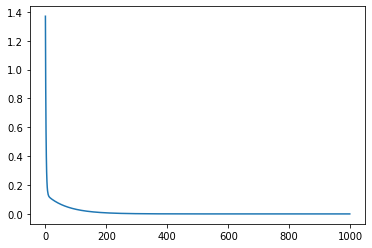

In [ ]:

plt.plot(error_list)
plt.show()

#러닝rate가 너무 작으면 기울기이동이 작아지니까 같은epoch면 근접값에 가기가 어려워질 수 있음.
#그렇다고 learning rate 너무 크면 발산 위험있고.